## Imports and settings

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import seaborn as sns

from scipy import stats, signal

import random

from IPython.core.pylabtools import figsize

import warnings
warnings.filterwarnings('ignore')

## Ex.1

In [6]:
from itertools import product
def plot_sum_dice(dice, n_dices):
    x = range(1, dice+1)
    sum_x = [sum(y) for y in product(x, repeat=n_dices)]
    df = pd.DataFrame(sum_x, columns=['sum_x'])
    value_counts = df['sum_x'].value_counts()
    sum_of_values = sum(value_counts.values)
    dist = value_counts.index.values, value_counts.values /  sum_of_values
    plt.bar(dist[0], dist[1]);

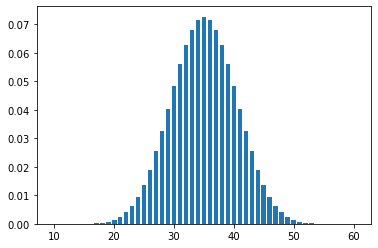

In [14]:
plot_sum_dice(6, 10)

## Ex.2

6.947300000000001 0.770449680381529


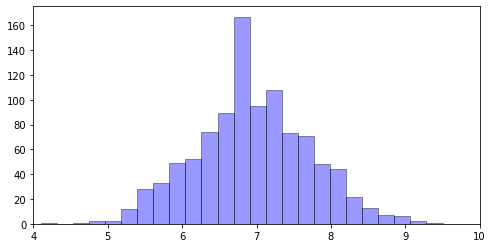

In [35]:
num_rollings = 10
num_trails = 1000
rolling_matrix = \
    np.random.randint(1, 7, (num_trails, num_rollings)) + \
    np.random.randint(1, 7, (num_trails, num_rollings))
means_arr = rolling_matrix.mean(axis=1)
fig, ax = plt.subplots(figsize=(8, 4))

sns.distplot(means_arr, kde=False, ax=ax, hist_kws=dict(color='b', edgecolor="k", linewidth=1))
ax.set_xlim(4, 10)
print(means_arr.mean(), means_arr.std())

## Ex.3

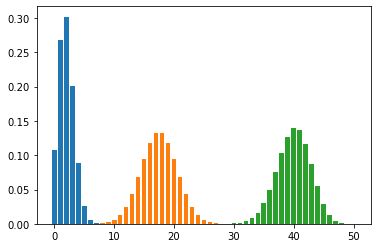

In [41]:
from scipy.stats import binom
n = [10, 35, 50]
p = [0.2, 0.5, 0.8]

for c_n, c_p in zip(n, p):
    x = range(c_n+1)
    y = binom.pmf(x, c_n, c_p)
    
    plt.bar(x, y)

## Ex.4

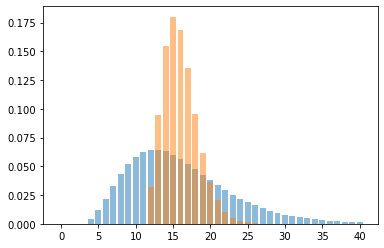

In [65]:
from scipy.stats import nbinom
r = 4
p = 0.25
m = 3
max_tarils = 40
x = [x for x in range(0, max_tarils+1)]
y_first = nbinom.pmf(x, r, p, loc=r)
y_second = nbinom.pmf(x, m*r, m*p, loc=m*r)
plt.bar(x, y_first, alpha=0.5)
plt.bar(x, y_second, alpha=0.5);

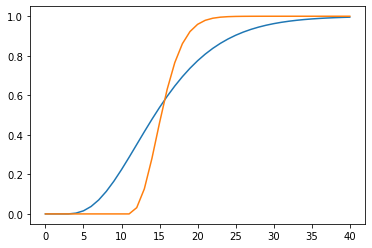

In [67]:
y_first = nbinom.cdf(x, r, p, loc=r)
y_second = nbinom.cdf(x, m*r, m*p, loc=m*r)
plt.plot(x, y_first)
plt.plot(x, y_second);

## Ex.5

In [70]:
from scipy.stats import binom

def find_sample_size_binom(defective_rate, requested_probability, at_least_x_defective):
    """
    Using Binom to returns the minimal number of samples required to have requested_probability of receiving 
    at_least_x_defective products from a production line with a defective rate of defective_rate.
    """
    
    prob = 0
    n = at_least_x_defective - 1    
    while prob < requested_probability:
        n +=1
        # sf = 1 - cdf -> checking P(X > at_least_x_defective - 1) -> P(X >= at_least_x_defective)
        prob = binom.sf(at_least_x_defective - 1, n, defective_rate)  
    return n

In [77]:
from scipy.stats import nbinom

def find_sample_size_nbinom(defective_rate, requested_probability, at_least_x_defective):
    """
    Using NBinom to return the minimal number of samples required to have requested_probability of receiving 
    at_least_x_defective products from a production line with a defective rate of defective_rate.
    """
    
    prob = 0 
    k = -1 # num_failures
    while prob < requested_probability:
        k +=1
        prob = nbinom.cdf(k, at_least_x_defective, defective_rate, loc=at_least_x_defective)  
    return k

In [78]:
find_sample_size_binom(0.01, 0.75, 1), find_sample_size_nbinom(0.01, 0.75, 1)

(138, 138)

In [79]:
stats.nbinom.ppf(q=0.75, n=1, p=0.01, loc=1)

138.0

In [80]:
find_sample_size_binom(0.04, 0.95, 1), find_sample_size_nbinom(0.04, 0.95, 1)

(74, 74)

In [81]:
stats.nbinom.ppf(q=0.95, n=1, p=0.04, loc=1)

74.0

In [82]:
find_sample_size_binom(0.10, 0.90, 5), find_sample_size_nbinom(0.10, 0.90, 5)

(78, 78)

In [83]:
stats.nbinom.ppf(q=0.90, n=5, p=0.10, loc=5)

78.0

In [84]:
find_sample_size_binom(0.20, 0.90, 10), find_sample_size_nbinom(0.20, 0.90, 10)

(69, 69)

In [85]:
stats.nbinom.ppf(q=0.90, n=10, p=0.20, loc=10)

69.0

r - num_successes <br>
p - success probability

In Scipy nbinom calculates the number of failure.<br>
We are calculating the number of trails.<br>
We need to add to Scipy result the amount of successes (r) in order to get the amount of trails.<br>
We can do that using the loc param.

In [53]:
nbinom.mean(5, 0.1, loc=5), nbinom.mean(10, 0.2, loc=10)

(50.0, 50.0)

We saw that the mean of NBinom(r, p) is $\dfrac{r}{p}$. <br>
If we are multiply r and p in some scalar $\alpha$ **the mean won't be changed**
$$\dfrac{\alpha r}{\alpha p} = \dfrac{r}{p}$$

The means are the same. What about the variances?

In [54]:
nbinom.var(5, 0.1, loc=5), nbinom.var(10, 0.2, loc=10)

(450.0, 200.0)

We saw in class that the variance of NBinom(r, p) is $\dfrac{r(1-p)}{p^2}$. <br>
If we are multiply r and p in some scalar $\alpha$ **the variance will be changed**
$$\dfrac{\alpha r(1-\alpha p)}{(\alpha p)^2} = \dfrac{r(1-\alpha p)}{\alpha p^2}$$
For $\alpha > 1$:
$$\dfrac{r(1-\alpha p)}{\alpha p^2} < \dfrac{r(1-p)}{p^2}$$
\* The numerator is decreasing and the denominator is increasing

The conclusion is that when the desire probability is large enough we need more trails in the large variance case. <br>
If the desire probability is low we'll prefer the distribution with the low variance.

In [55]:
def plot_kde_with_fill(x, fill_end_point, line_color, fill_color, ax, dist_mean):
    #plotting the PDF (do this before plotting anything else)
    ax_ = sns.distplot(x, hist=True, ax=ax, color=line_color)
    kde_x, kde_y = ax_.lines[0].get_data()
    max_x = int(np.ceil(max(kde_x)))
    min_x = int(np.floor(min(kde_x)))
    #plotting the two lines
    p1 = ax_.axvline(x=fill_end_point, color=line_color)
    p2 = ax_.axvline(x=dist_mean, color=line_color, linestyle='--')
    
    ax.set_xlim(0, 91)
    ax.set_xticks(range(0, 91, 2))

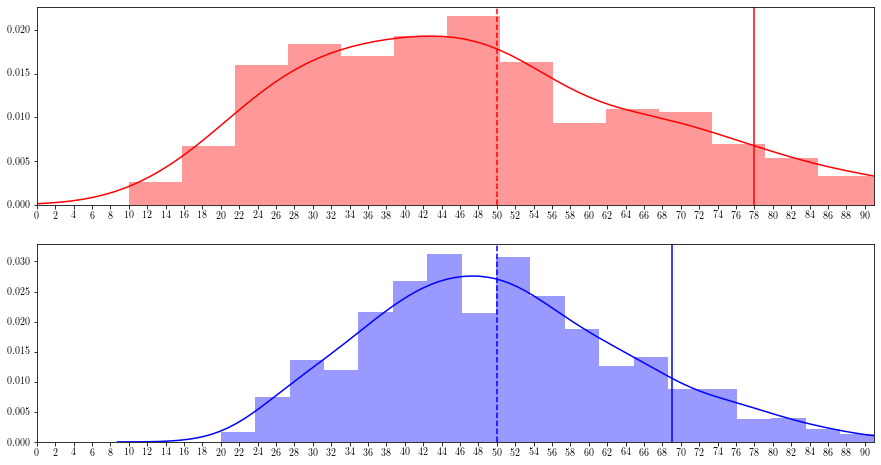

In [58]:
# 2
x_binom_1b2 = nbinom.rvs(5, 0.1, loc=5, size=1000)
at_least_x_defective_1b2 = 5
# 3
x_binom_1b3 = nbinom.rvs(10, 0.2, loc=10, size=1000)
at_least_x_defective_1b3 = 10

fig, ax = plt.subplots(2, 1)
fig.set_figwidth(15)
fig.set_figheight(8)

plot_kde_with_fill(x_binom_1b2, 78, 'r', '#EF9A9A', ax[0], 5 / 0.1)
plot_kde_with_fill(x_binom_1b3, 69, 'b', '#33CCFF', ax[1], 10 / 0.2)

plt.show()

## Ex.6

In [6]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18,mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

population_ages.mean()

43.002372

In [7]:
np.random.seed(6)
sample_ages = np.random.choice(a=population_ages,
                               size=500)            # Sample 500 values
print ( sample_ages.mean() )                         # Show sample mean
sample_ages.mean() - population_ages.mean()    # Check difference between means

42.388


-0.614372000000003

-0.12008483603917186


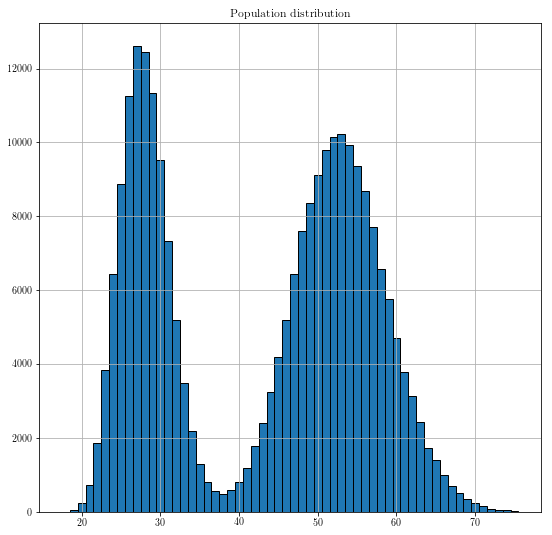

In [8]:
pd.DataFrame(population_ages).hist(bins=58, 
                                  range=(17.5,75.5),
                                  figsize=(9,9),
                                  edgecolor="k", linewidth=1)
plt.title('Population distribution')
print(stats.skew(population_ages))

-0.056225282585406065


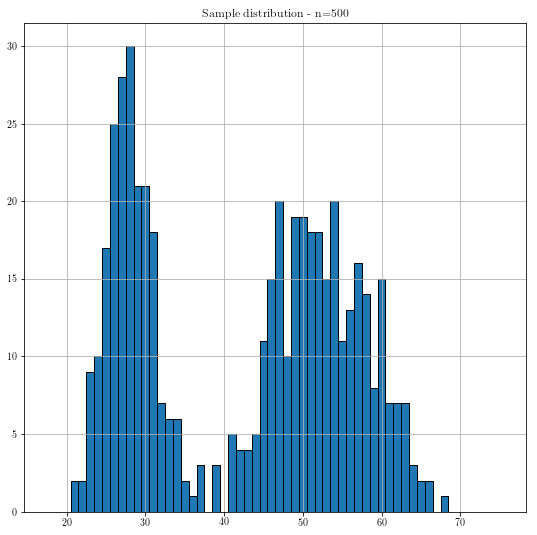

In [9]:
pd.DataFrame(sample_ages).hist(bins=58, 
                                  range=(17.5,75.5),
                                  figsize=(9,9),
                                  edgecolor="k", linewidth=1)
plt.title('Sample distribution - n=500')
print(stats.skew(sample_ages))

## Ex 8

In [4]:
X = np.arange(31)
Xp = np.array([1/31] * 31)
Y = np.array([0, 31, 62]) + 10
Yp = np.array([1/3] * 3)

In [21]:
Z = {}
for x, xp in zip(X, Xp):
    for y, yp in zip(Y, Yp):
        if x+y in Z:
            Z[x+y] += xp*yp
        else:
            Z[x+y] = xp*yp

In [24]:
[(key, value) for (key, value) in sorted(Z.items())]

[(10, 0.01075268817204301),
 (11, 0.01075268817204301),
 (12, 0.01075268817204301),
 (13, 0.01075268817204301),
 (14, 0.01075268817204301),
 (15, 0.01075268817204301),
 (16, 0.01075268817204301),
 (17, 0.01075268817204301),
 (18, 0.01075268817204301),
 (19, 0.01075268817204301),
 (20, 0.01075268817204301),
 (21, 0.01075268817204301),
 (22, 0.01075268817204301),
 (23, 0.01075268817204301),
 (24, 0.01075268817204301),
 (25, 0.01075268817204301),
 (26, 0.01075268817204301),
 (27, 0.01075268817204301),
 (28, 0.01075268817204301),
 (29, 0.01075268817204301),
 (30, 0.01075268817204301),
 (31, 0.01075268817204301),
 (32, 0.01075268817204301),
 (33, 0.01075268817204301),
 (34, 0.01075268817204301),
 (35, 0.01075268817204301),
 (36, 0.01075268817204301),
 (37, 0.01075268817204301),
 (38, 0.01075268817204301),
 (39, 0.01075268817204301),
 (40, 0.01075268817204301),
 (41, 0.01075268817204301),
 (42, 0.01075268817204301),
 (43, 0.01075268817204301),
 (44, 0.01075268817204301),
 (45, 0.010752688172

## Ex 9

In [60]:
X1p = stats.geom.pmf(range(1, 7), p=1)
X2p = stats.geom.pmf(range(1, 7), p=2/3)
X3p = stats.geom.pmf(range(1, 7), p=1/3)

In [61]:
X1_2p = np.convolve(X1p, X2p)[:6]

In [62]:
res = np.convolve(X1_2p, X3p)[:6]

In [63]:
print('{:.5f}'.format(0))
print('{:.5f}'.format(0))
Y = [print('{:.5f}'.format(x)) for x in res[:4]] 

0.00000
0.00000
0.22222
0.22222
0.17284
0.12346


## Ex 10

M - number of balls
n - number of good balls
N - number of drawn nalls
k - successes
stats.hypergeom.pmf(k, M, n, N)

In [74]:
P1 = stats.hypergeom.pmf(6, 37, 6, 6) / 7

In [75]:
P2 = P1 * 6

In [78]:
expected = -3 + 10000000*P1 + 500000*P2

In [79]:
expected

-2.201154663339536

In [80]:
expected * 14

-30.816165286753503

## Ex 11

In [129]:
def markov_dice_roll(trajectory_size, num_trujectories):
    draw = np.random.choice(np.arange(1, 7))
    means = []
    for i in range(num_trujectories):
        draws = []
        for j in range(trajectory_size):
            draw = np.random.choice([6 if x==0 else x for x in [(draw - 1) % 6, draw, (draw + 1) % 6]], p=[0.25, 0.5, 0.25])
            draws.append(draw)
        means.append(np.mean(draws))
    mu = np.mean(means)
    std = np.std(means)
    print(mu, std)
    plt.hist(means, bins=100, normed=True)
    x = np.linspace(1, 6, 1000)
    y = stats.norm.pdf(x, mu, std)
    plt.plot(x, y)

3.4750499999999995 0.8084182070562241


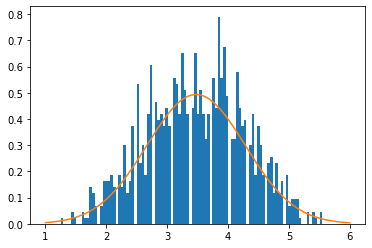

In [130]:
trajectory_size = 20
num_trujectories = 1000
markov_dice_roll(trajectory_size, num_trujectories)

3.499445 0.2693247425971108


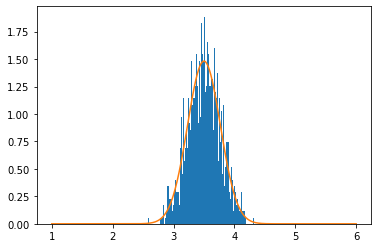

In [133]:
trajectory_size = 200
num_trujectories = 1000
markov_dice_roll(trajectory_size, num_trujectories)

3.4978315 0.08558167068800421


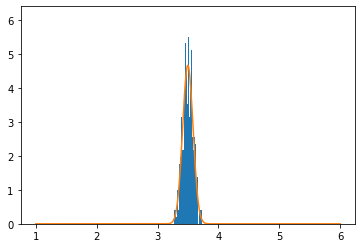

In [131]:
trajectory_size = 2000
num_trujectories = 1000
markov_dice_roll(trajectory_size, num_trujectories)

In [132]:
np.sqrt(20), np.sqrt(2000)

(4.47213595499958, 44.721359549995796)

## Ex 12

In [137]:
Fred = stats.norm(30, 5)
Mel = stats.norm(35, 7)
Sid = stats.norm(40, 10)

In [141]:
Fred.cdf(45)

0.9986501019683699

$f(X) = w_1 N(30,5) + w_2 N(35,7) + w_3 N(40,10)$

$F(X) = w_1 \Phi \left(\dfrac{X-30}{5}\right) + w_2 \Phi \left(\dfrac{X-35}{7}\right) + w_3 \Phi \left(\dfrac{X-40}{10}\right)$

In [143]:
Fred.ppf(0.95), Mel.ppf(0.95), Sid.ppf(0.95)

(38.22426813475736, 46.513975388660306, 56.44853626951472)

In [145]:
for x in range(40, 100):
    p = 0.5*Fred.cdf(x) + 0.25*Mel.cdf(x) + 0.25*Sid.cdf(x)
    if p > 0.95:
        print(x)
        break

50


In [151]:
0.5*Fred.cdf(50) + 0.25*Mel.cdf(50) + 0.25*Sid.cdf(50)

0.956304779495262

## Ex 14

In [35]:
x =list(range(49))

In [36]:
x.append(10000)

In [63]:
y = [1] * 48

In [64]:
y.append(0)

In [65]:
y.append(10000)

In [68]:
y[0] = 0

In [69]:
stats.pearsonr(x, y)

(0.9999497531301523, 1.2887032726442043e-97)

In [70]:
stats.pearsonr(x[:-1], y[:-1])

(2.5910827527634436e-17, 1.0)